In [0]:
import keras
keras.__version__
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [197]:


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("Download done!")

Download done!


[1]


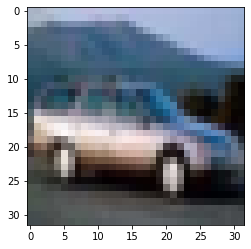

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline
picture_id = 4
digit = train_images[picture_id]
plt.imshow(digit, cmap=plt.cm.binary)
print(train_labels[picture_id])
plt.show()

In [0]:
valid_size = 2000
(validation_images, train_images) = train_images[:valid_size], train_images[valid_size:]
(validation_labels, train_labels) = train_labels[:valid_size], train_labels[valid_size:]
train_images = train_images.reshape((50000-valid_size, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
validation_labels = to_categorical(validation_labels)

In [0]:
def count_up(curr_labels):
    tmp = curr_labels.transpose()
    summary = []
    for i in range(10):
        summary.append(tmp[i].sum())
        
    return summary

In [0]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))
# conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [0]:
adaam = Adam(lr=.0000001)
model.compile(optimizer=adaam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [0]:
conv_base.summary()
model.summary()

In [0]:
conv_base.trainable = False

# set_trainable = False
# for layer in conv_base.layers:
#     if "block5_conv" in layer.name:
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

In [216]:
epoch = 4
model_hist = model.fit(train_images, train_labels,
          epochs=epoch, batch_size=1024, validation_data=(validation_images,validation_labels))

Train on 48000 samples, validate on 2000 samples
Epoch 1/4
48000/48000 [==============================] - 7s 139us/step - loss: 0.0085 - acc: 0.9984 - val_loss: 4.0085 - val_acc: 0.7485
Epoch 2/4
48000/48000 [==============================] - 4s 76us/step - loss: 0.0088 - acc: 0.9983 - val_loss: 4.0082 - val_acc: 0.7485
Epoch 3/4
48000/48000 [==============================] - 4s 77us/step - loss: 0.0086 - acc: 0.9984 - val_loss: 4.0081 - val_acc: 0.7485
Epoch 4/4
48000/48000 [==============================] - 4s 76us/step - loss: 0.0087 - acc: 0.9982 - val_loss: 4.0080 - val_acc: 0.7485


In [0]:
import matplotlib.pyplot as plt

epochs = range(0, epoch)
train_loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, train_loss, 'bo', label='training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [221]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_loss

10000/10000 [==============================] - 2s 241us/step
test_acc: 0.8561


0.9357943317964673

In [220]:
from google.colab import files
model.save_weights('./cifar10.h5', overwrite=True)
files.download("cifar10.h5")
print("DONE")

DONE
